# Frame2D documentation

#### Key points:

* Units used are [m], [kN] and [kNm]
* Always remember to generate frame before calculation
* Members/ loads /supports can't be added after the generation


#### Members
* SteelBeam(*coordinates*)
* Optional arguments:
    - profile (string)
    - material (string)
    - num_elements (int)
    - Sj1 (float)
    - Sj2 (float)
* Most used attributes:
    - r -- utilization ratios [N, V, M, N + M, By, Bz, LT]
    


#### Loads
* PointLoad(*coordinate, [Fx, Fy, Mz]*)
* LineLoad(*member, [q1, q1], direction*)
* Optional arguments:
    - load_id (int)
    - ltype (string)
    - name (string)
    - f (float)


#### Supports
* FixedSupport(*coordinate*)
* XHingedSupport(*coordinate*)
* YHingedSupport(*coordinate*)
* XYHingedSupport(*coordinate*)

#### Most used frame methods
* add(*item*) -- add item to frame
* calculate() -- calculate internal forces
* generate() -- generates frame
* plot() -- plots frame
* bmd(*scale*) -- plots bending moment diagram
* plot_deflection(*scale*) -- plots deflected frame
* to_robot(*filename, num_frames, s, brace_profile*) -- creates .str -file of the frame




## Typical workflow

This section describes typical usage of the Frame2D module.

Frames can be created in two different ways: 
1. Creating and adding each member seperately (unique frame)
2. Creating a simple frame (symmetrical, rule-based frame)



Start by importing dependencies.

In [1]:
import sys
# NOTE! This path needs to be changed to your own filepath!
sys.path.append('C:\\Users\\huusk\\OneDrive\\Tiedostot\\GIT\\src')
from truss2d import Truss2D, TopChord, BottomChord, TrussWeb
from frame2d.frame2d import Frame2D, SteelColumn, SteelBeam, FixedSupport, PointLoad, LineLoad

Let's create a semi-rigidly supported frame like the one below.


In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.springernature.com/lw785/springer-static/image/art%3A10.1007%2Fs13296-018-0008-z/MediaObjects/13296_2018_8_Fig13_HTML.gif")

### 1. Creating and adding each member seperately

Start by creating a Frame2D -instance and beams and columns

In [3]:
# Frame2D -instance
frame = Frame2D()
# Columns' coordinates
coords1 = [[0, 0], [0, 4]]
coords2 = [[8, 0], [8, 4]]
# Beam's coordinates
coords3 = [[0, 4], [8, 4]]
# Column instances
column1 = SteelColumn(coords1, profile="HE 240 B")
column2 = SteelColumn(coords2, profile="HE 240 B")
# Beam instance
beam1 = SteelBeam(coords3, profile="IPE 400")

Create loads and supports

In [4]:
# Loads' coordinates
c1 = [0, 4]
c2 = [2, 4]
c3 = [6, 4]
c4 = [8, 4]
# Supports' coordinates
c5 = [0, 0]
c6 = [8, 0]
# Load instances, values are kN's
P = -120
H = 20
HP1 = PointLoad(c1, [H, P, 0])
P1 = PointLoad(c2, [0, P, 0])
P2 = PointLoad(c3, [0, P, 0])
HP2 = PointLoad(c4, [H, P, 0])
# Support instances
sup1 = FixedSupport(c5)
sup2 = FixedSupport(c6)

Now we can add members, loads and supports to the frame

In [5]:
# Add columns
frame.add(column1)
frame.add(column2)
# Add beam
frame.add(beam1)
# Add pointloads
frame.add(HP1)
frame.add(P1)
frame.add(P2)
frame.add(HP2)
# Add supports
frame.add(sup1)
frame.add(sup2)

To create semi-rigid connections between the column and the footing, we need to change column's joint rigidity

In [6]:
# Sj1 changes the joint rigidity in member's first coordinate
# unit is kNm/rad
column1.Sj1 = 20000
column2.Sj1 = 20000

Now we can generate the frame and calculate the results.

In [7]:
frame.generate()
frame.calculate()

Each member has their utilization ratios saved to a list. The utilization ratios are in order [N, V, M, N + M, By, Bz, LT].
* N - axial 
* V - shear 
* M - moment 
* NM - axial and moment combined
* By - buckling about y
* Bz - buckling about z
* LT - lateral-torsional buckling

We can print each member's utilization ratios by calling attribute .r

In [8]:
for member in frame.members.values():
    print(member.mem_id, " ", [round(r, 3) for r in member.r])

0   [0.062, 0.036, 0.225, 0.225, 0.07, 0.099, 0.276]
1   [0.066, 0.095, 0.409, 0.409, 0.075, 0.106, 0.502]
2   [0.015, 0.147, 0.33, 0.33, 0.017, 0.118, 1.134]


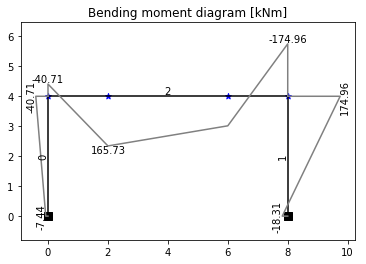

In [25]:
frame.bmd(10)

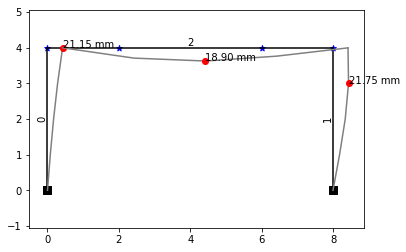

In [37]:
frame.plot_deflection(20)

### 2. Creating frame using simple list



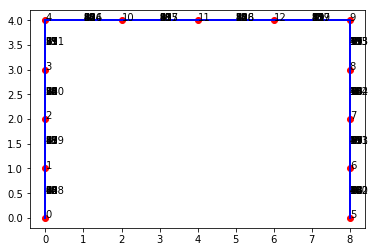

LinAlgError: Singular matrix

In [49]:
# simple = [storeys, bays, storey height, bay length]
simple = [1, 1, 4, 8]
# Create frame
simple_frame = None
simple_frame = Frame2D(simple=simple, supports='fixed')
# Change memebers' profiles
for member in simple_frame.members.values():
    if member.mtype == 'beam':
        member.profile = "IPE 400"
    else:
        member.profile = "HE 240 B"
# Loads' coordinates
c1 = [0, 4]
c2 = [2, 4]
c3 = [6, 4]
c4 = [8, 4]
# Load instances, values are kN's
P = -120
H = 20
HP1 = PointLoad(c1, [H, P, 0])
P1 = PointLoad(c2, [0, P, 0])
P2 = PointLoad(c3, [0, P, 0])
HP2 = PointLoad(c4, [H, P, 0])
# Add pointloads
simple_frame.add(HP1)
simple_frame.add(P1)
simple_frame.add(P2)
simple_frame.add(HP2)
# Generate frame
simple_frame.generate()
simple_frame.f.draw()
# Calculate results
simple_frame.calculate()

### Creating a portal frame with truss

### Exporting frame to Autodesk Robot

## TODO
Here's a list of things that still needs to be implemented

* Buckling length calculation, currently using member's length as Lcr
* 2nd order analysis, P-delta
* Link to Tekla or AutoCAD
* Deleting members
* Adding more members/ loads/ supports after the frame has been generated

### Known bugs
* -